Title: Investment in renewable energy (World)

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%reload_ext google.colab.data_table


In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/JoKa1986/CO2-Emmission---Final-Project/refs/heads/main/investment-in-renewable-energy-by-technology.csv')
df.head()

# Organizing data
df.drop(columns=['Code'], inplace=True)
df.rename(columns={'Entity':'Country'}, inplace=True)
df = df[df['Year'] >= 2015]
df.head()

,Country,Year,Marine energy,Small hydropower,Geothermal energy,Biofuels,Biomass and waste-to-energy,Wind energy,Solar energy
11,World,2015,200000000,4199999700,2500000000,3600000000,10400000000,119700000000,176600000000
12,World,2016,200000000,4300000000,2700000000,2099999900,15200000000,123500000000,145900000000
13,World,2017,200000000,4000000000,2400000000,3300000000,7400000000,133399994000,180800000000
14,World,2018,200000000,2300000000,2500000000,3300000000,11500000000,132700000000,143500000000
15,World,2019,200000000,2500000000,1200000000,3000000000,11200000000,142700000000,141000000000


In [10]:
df_lev = pd.read_csv('https://raw.githubusercontent.com/JoKa1986/CO2-Emmission---Final-Project/refs/heads/main/levelized-cost-of-energy.csv')
df_lev.head()

# Organize data
df_lev.drop(columns=['Code'], inplace=True)
df_lev.rename(columns={'Entity':'Country'}, inplace=True)
df_lev.rename(columns={'Bioenergy levelized cost of energy':'Bio-energy', 'Geothermal levelized cost of energy':'Geothermal'}, inplace=True)
df_lev.rename(columns={'Offshore wind levelized cost of energy':'Offshore wind', 'Onshore wind levelized cost of energy':'Onshore wind'}, inplace=True)
df_lev.rename(columns={'Concentrated solar power levelized cost of energy':'Concentrated solar', 'Solar photovoltaic levelized cost of energy':'Solar photocvoltaic'}, inplace=True)
df_lev.rename(columns={'Hydropower levelized cost of energy':'Hydropower'}, inplace=True)
df_lev.rename(columns={'Entity':'Country'}, inplace=True)
df_lev = df_lev[df_lev['Year'] >= 2019]
df_lev.head(100)

#df_lev.isnull().sum()

,Country,Year,Bio-energy,Geothermal,Offshore wind,Solar photocvoltaic,Concentrated solar,Hydropower,Onshore wind
10,Argentina,2019,NaN,NaN,NaN,NaN,NaN,NaN,0.066861
11,Argentina,2020,NaN,NaN,NaN,NaN,NaN,NaN,0.074740
12,Argentina,2021,NaN,NaN,NaN,NaN,NaN,NaN,0.072457
13,Argentina,2022,NaN,NaN,NaN,NaN,NaN,NaN,0.053053
14,Argentina,2023,NaN,NaN,NaN,NaN,NaN,NaN,0.088106
...,...,...,...,...,...,...,...,...,...
458,Netherlands,2019,NaN,NaN,NaN,0.104006,NaN,NaN,0.053873
459,Netherlands,2020,NaN,NaN,NaN,0.100650,NaN,NaN,0.040070
460,Netherlands,2021,NaN,NaN,NaN,0.083571,NaN,NaN,0.045292
461,Netherlands,2022,NaN,NaN,NaN,0.091196,NaN,NaN,0.046655


In [11]:
# Grouping by country to get only the world
df_gr=df_lev.copy()
df_gr.head()

df_grouped = df_gr.groupby('Country')
df_world = df_grouped.get_group('World')
df_world.head()
#df_world.columns

,Country,Year,Bio-energy,Geothermal,Offshore wind,Solar photocvoltaic,Concentrated solar,Hydropower,Onshore wind
794,World,2019,0.069156,0.073327,0.093179,0.067467,0.241610,0.045939,0.047995
795,World,2020,0.077995,0.061647,0.088160,0.060086,0.121824,0.050994,0.039882
796,World,2021,0.072303,0.073723,0.079872,0.052133,0.124311,0.053232,0.035502
797,World,2022,0.062921,0.057813,0.079798,0.050495,0.122017,0.061183,0.033652
798,World,2023,0.071544,0.071112,0.074506,0.044247,0.117258,0.057057,0.032578


In [2]:

df1 = pd.read_csv('https://raw.githubusercontent.com/JoKa1986/CO2-Emmission---Final-Project/refs/heads/main/levelized-cost-of-energy.csv')
df1.head()
df1.drop(columns=['Code'], inplace=True)
df1 = df1[df1['Year'] >= 2015]
df1.rename(columns={'Bioenergy levelized cost of energy': 'Bioenergy cost','Geothermal levelized cost of energy':'Geothermal cost','Offshore wind levelized cost of energy':'Offshore wind cost','Hydropower levelized cost of energy':'Hydropower cost','Onshore wind levelized cost of energy':'Onshore wind cost','Solar photovoltaic levelized cost of energy':'Solar photovoltaics cost','Concentrated solar power levelized cost of energy':'Concentrated solar cost'}, inplace=True)
df = df1.loc[df1['Entity'] == 'World']
df.head(10)

,Entity,Year,Bioenergy cost,Geothermal cost,Offshore wind cost,Solar photovoltaics cost,Concentrated solar cost,Hydropower cost,Onshore wind cost
790,World,2015,0.078206,0.063738,0.152099,0.132362,0.246006,0.040573,0.074434
791,World,2016,0.076558,0.073564,0.124148,0.115932,0.290460,0.053683,0.068879
792,World,2017,0.076438,0.076960,0.114745,0.091176,0.278293,0.056271,0.064615
793,World,2018,0.059010,0.074275,0.108094,0.077332,0.163500,0.044195,0.054764
794,World,2019,0.069156,0.073327,0.093179,0.067467,0.241610,0.045939,0.047995
795,World,2020,0.077995,0.061647,0.088160,0.060086,0.121824,0.050994,0.039882
796,World,2021,0.072303,0.073723,0.079872,0.052133,0.124311,0.053232,0.035502
797,World,2022,0.062921,0.057813,0.079798,0.050495,0.122017,0.061183,0.033652
798,World,2023,0.071544,0.071112,0.074506,0.044247,0.117258,0.057057,0.032578


In [22]:
df1=df.copy()
df1.drop(columns=['Entity'], inplace=True)
df1.set_index('Year', inplace=True)
df1.head(10)

df_bio = df1.loc[:,['Bioenergy cost']]
df_bio.head(10)

,Bioenergy cost
Year,
2015,0.078206
2016,0.076558
2017,0.076438
2018,0.059010
2019,0.069156
2020,0.077995
2021,0.072303
2022,0.062921
2023,0.071544


In [23]:
x = df_bio.index.values.reshape(-1, 1)
y = df_bio['Bioenergy cost']

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [25]:
y_pred = model.predict(x)

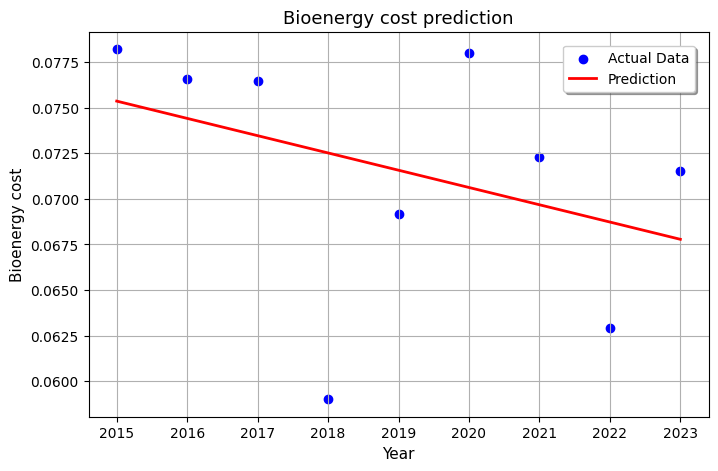

In [26]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, y_pred, color='red', linewidth =2, label='Prediction')
plt.xlabel('Year', fontsize=11)
plt.ylabel('Bioenergy cost', fontsize=11)
plt.title('Bioenergy cost prediction', fontsize=13)
plt.legend(loc='upper right', shadow=True, borderaxespad=1, fontsize='medium', fancybox=True)
plt.grid(True)
plt.show()

In [7]:
df1=df.copy()
df1.drop(columns=['Entity'], inplace=True)
df1.set_index('Year', inplace=True)
df1.head(10)

df_geo = df1.loc[:,['Geothermal cost']]
df_geo.head(10)

x_geo = df_geo.index.values.reshape(-1, 1)
y_geo = df_geo['Geothermal cost']

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_geo, y_geo)

LinearRegression()

In [9]:
y_geo_pred = model.predict(x_geo)

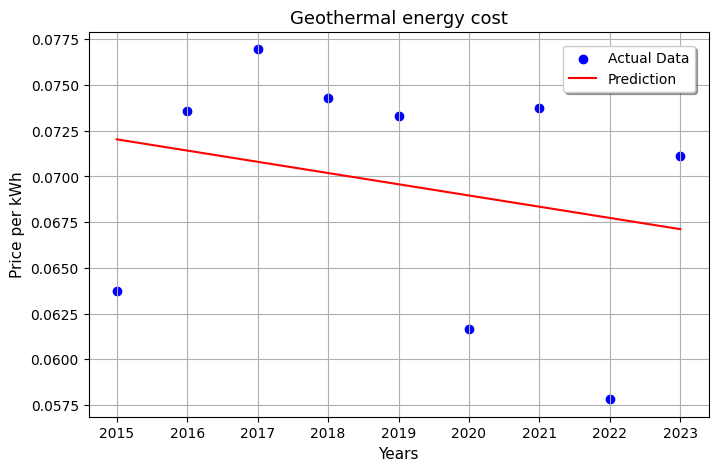

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(x_geo, y_geo, color='blue', label='Actual Data')
plt.plot(x_geo, y_geo_pred, color='red', label='Prediction')
plt.xlabel('Years', fontsize=11)
plt.ylabel('Price per kWh', fontsize=11)
plt.title('Geothermal energy cost', fontsize=13)
plt.legend(shadow=True, loc='upper right',borderaxespad=1, fontsize='medium', fancybox=True)
plt.grid()
plt.show()

In [43]:
import numpy as np
import pandas as pd

df1 = df.copy()
df1.drop(columns=['Entity'], inplace=True)
df1.set_index('Year', inplace=True)
df_off = df1.loc[:,['Offshore wind cost']]

x_off = df_off.index.values.reshape(-1, 1)
y_off = df_off['Offshore wind cost']

df_off.head(10)

,Offshore wind cost
Year,
2015,0.152099
2016,0.124148
2017,0.114745
2018,0.108094
2019,0.093179
2020,0.088160
2021,0.079872
2022,0.079798
2023,0.074506


In [39]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_off, y_off)

LinearRegression()

In [40]:
y_off_pred = model.predict(x_off)

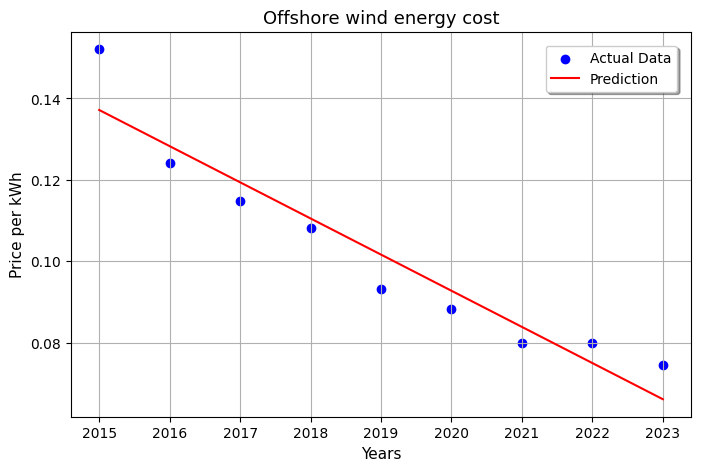

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(x_off, y_off, color='blue', label='Actual Data')
plt.plot(x_off, y_off_pred, color='red', label='Prediction')
plt.xlabel('Years', fontsize=11)
plt.ylabel('Price per kWh', fontsize=11)
plt.title('Offshore wind energy cost', fontsize=13)
plt.legend(shadow=True, loc='upper right',borderaxespad=1, fontsize='medium', fancybox=True)
plt.grid()
plt.show()

In [16]:
import pandas as pd
import numpy as np

df_wind = df.copy()
df_wind.drop(columns=['Entity'], inplace=True)
df_wind.set_index('Year', inplace=True)
df_wind = df_wind.loc[:,['Onshore wind cost']]

xw = df_wind.index.values.reshape(-1, 1)
yw = df_wind['Onshore wind cost']

df_wind.head(10)

,Onshore wind cost
Year,
2015,0.074434
2016,0.068879
2017,0.064615
2018,0.054764
2019,0.047995
2020,0.039882
2021,0.035502
2022,0.033652
2023,0.032578


In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(xw, yw)

LinearRegression()

In [18]:
yw_pred = model.predict(xw)

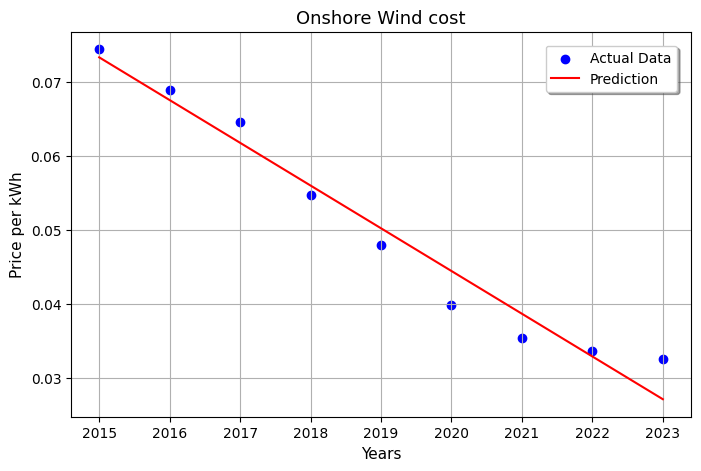

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(xw, yw, color='blue', label='Actual Data')
plt.plot(xw, yw_pred, color='red', label='Prediction')
plt.xlabel('Years', fontsize=11)
plt.ylabel('Price per kWh', fontsize=11)
plt.title('Onshore Wind cost', fontsize=13)
plt.legend(shadow=True, loc='upper right',borderaxespad=1, fontsize='medium', fancybox=True)
plt.grid()
plt.show()

In [45]:
import pandas as pd
import numpy as np

df_sol = df.copy()

df_sol.drop(columns=['Entity'], inplace=True)
df_sol.set_index('Year', inplace=True)
df_sol = df_sol.loc[:,['Solar photovoltaics cost']]

xs = df_sol.index.values.reshape(-1, 1)
ys = df_sol['Solar photovoltaics cost']

df_sol.head(10)

,Solar photovoltaics cost
Year,
2015,0.132362
2016,0.115932
2017,0.091176
2018,0.077332
2019,0.067467
2020,0.060086
2021,0.052133
2022,0.050495
2023,0.044247


In [49]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(xs, ys)

LinearRegression()

In [50]:
ys_pred = model.predict(xs)

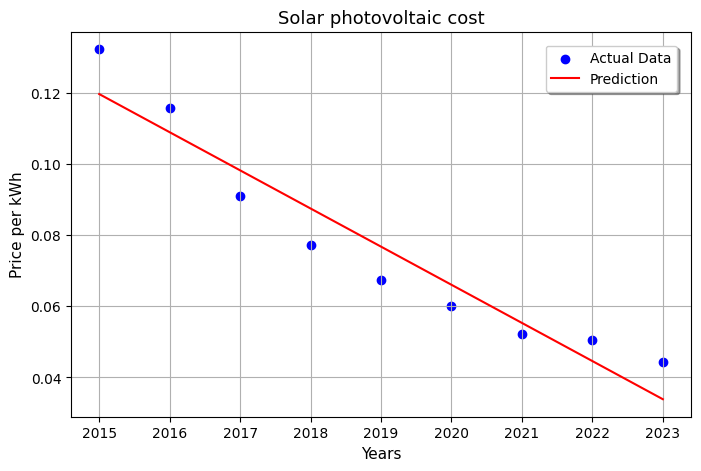

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(xs, ys, color='blue', label='Actual Data')
plt.plot(xs, ys_pred, color='red', label='Prediction')
plt.xlabel('Years', fontsize=11)
plt.ylabel('Price per kWh', fontsize=11)
plt.title('Solar photovoltaic cost', fontsize=13)
plt.legend(shadow=True, loc='upper right',borderaxespad=1, fontsize='medium', fancybox=True)
plt.grid()
plt.show()

In [56]:
import pandas as pd
import numpy as np

df_cons = df.copy()

df_cons.drop(columns=['Entity'], inplace=True)
df_cons.set_index('Year', inplace=True)
df_cons = df_cons.loc[:,['Concentrated solar cost']]

xc = df_cons.index.values.reshape(-1, 1)
yc = df_cons['Concentrated solar cost']

df_cons.head(10)

,Concentrated solar cost
Year,
2015,0.246006
2016,0.290460
2017,0.278293
2018,0.163500
2019,0.241610
2020,0.121824
2021,0.124311
2022,0.122017
2023,0.117258


In [57]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(xc, yc)

LinearRegression()

In [58]:
yc_pred = model.predict(xc)

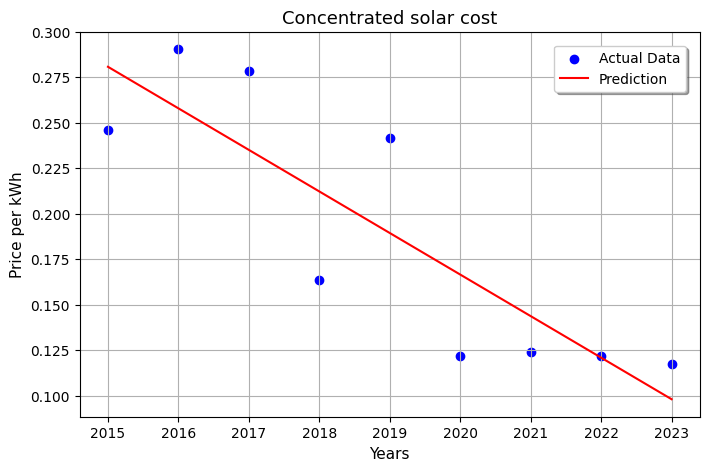

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(xc, yc, color='blue', label='Actual Data')
plt.plot(xc, yc_pred, color='red', label='Prediction')
plt.xlabel('Years', fontsize=11)
plt.ylabel('Price per kWh', fontsize=11)
plt.title('Concentrated solar cost', fontsize=13)
plt.legend(shadow=True, loc='upper right',borderaxespad=1, fontsize='medium', fancybox=True)
plt.grid()
plt.show()

In [11]:
import pandas as pd
import numpy as np

df_hyd = df.copy()

df_hyd.drop(columns=['Entity'], inplace=True)
df_hyd.set_index('Year', inplace=True)
df_hyd = df_hyd.loc[:,['Hydropower cost']]

xh = df_hyd.index.values.reshape(-1, 1)
yh = df_hyd['Hydropower cost']

df_hyd.head(10)

,Hydropower cost
Year,
2015,0.040573
2016,0.053683
2017,0.056271
2018,0.044195
2019,0.045939
2020,0.050994
2021,0.053232
2022,0.061183
2023,0.057057


In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(xh, yh)

LinearRegression()

In [13]:
yh_pred = model.predict(xh)

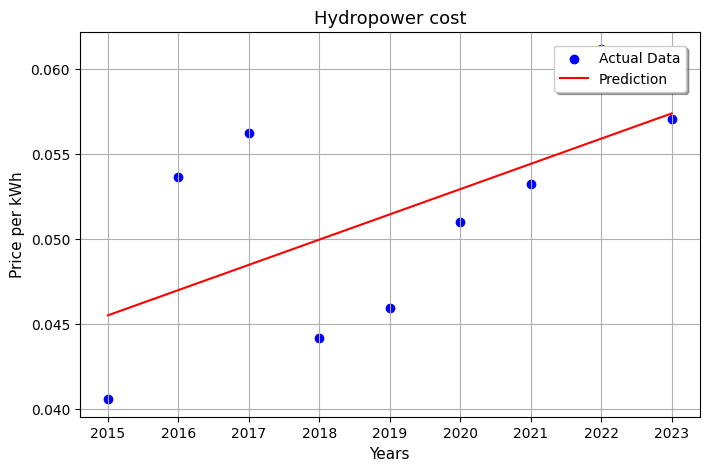

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(xh, yh, color='blue', label='Actual Data')
plt.plot(xh, yh_pred, color='red', label='Prediction')
plt.xlabel('Years', fontsize=11)
plt.ylabel('Price per kWh', fontsize=11)
plt.title('Hydropower cost', fontsize=13)
plt.legend(shadow=True, loc='upper right',borderaxespad=1, fontsize='medium', fancybox=True)
plt.grid()
plt.show()